# Trabajo Práctico N°2: Predicción de lluvia en Australia

Integrantes: Sebastian Palacio, Juana Chies Doumecq

#### Contexto  
completar 

### Variables del conjunto de datos  

**Variables explicativas:**  
- 

**Variable objetivo (target):**  
- 

## TP2

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.colors as mcolors
import seaborn as sns

In [1]:
df = pd.read_csv("weatherAUS.csv")

print(df.info())

NameError: name 'pd' is not defined

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtypes)

datetime64[ns]


In [ ]:
df.info

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Entrega número 1

### Clusterización de ciudades

In [5]:
# Coordenadas de las ciudades

#locations = df['Location'].unique()
coordenadas = {
    'Albury': (-36.0737, 146.9135),
    'BadgerysCreek': (-33.8833, 150.7333),
    'Cobar': (-31.4958, 145.8386),
    'CoffsHarbour': (-30.2963, 153.1139),
    'Moree': (-29.4628, 149.8419),
    'Newcastle': (-32.9283, 151.7817),
    'NorahHead': (-33.2817, 151.5714),
    'NorfolkIsland': (-29.0408, 167.9547),
    'Penrith': (-33.7511, 150.6942),
    'Richmond': (-33.6000, 150.7500),
    'Sydney': (-33.8688, 151.2093),
    'SydneyAirport': (-33.9461, 151.1772),
    'WaggaWagga': (-35.1082, 147.3598),
    'Williamtown': (-32.8156, 151.8431),
    'Wollongong': (-34.4278, 150.8931),
    'Canberra': (-35.2809, 149.1300),
    'Tuggeranong': (-35.4244, 149.0878),
    'MountGinini': (-35.5297, 148.7731),
    'Ballarat': (-37.5622, 143.8503),
    'Bendigo': (-36.7570, 144.2794),
    'Sale': (-38.1069, 147.0664),
    'MelbourneAirport': (-37.6690, 144.8410),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.1872, 142.1386),
    'Nhil': (-36.3319, 141.6503),
    'Portland': (-38.3453, 141.6044),
    'Watsonia': (-37.7111, 145.0831),
    'Dartmoor': (-37.9217, 141.2711),
    'Brisbane': (-27.4698, 153.0251),
    'Cairns': (-16.9186, 145.7781),
    'GoldCoast': (-28.0167, 153.4000),
    'Townsville': (-19.2590, 146.8169),
    'Adelaide': (-34.9285, 138.6007),
    'MountGambier': (-37.8297, 140.7828),
    'Nuriootpa': (-34.4667, 138.9833),
    'Woomera': (-31.1558, 136.8269),
    'Albany': (-35.0269, 117.8842),
    'Witchcliffe': (-34.0278, 115.1006),
    'PearceRAAF': (-31.6678, 116.0150),
    'PerthAirport': (-31.9403, 115.9672),
    'Perth': (-31.9505, 115.8605),
    'SalmonGums': (-32.9833, 121.6333),
    'Walpole': (-34.9778, 116.7333),
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4332, 147.1441),
    'AliceSprings': (-23.6980, 133.8807),
    'Darwin': (-12.4634, 130.8456),
    'Katherine': (-14.4653, 132.2636),
    'Uluru': (-25.3444, 131.0369)
}

coord_ciudades = pd.DataFrame([
    {'Location': ciudad, 'Latitude': coords[0], 'Longitude': coords[1]}
    for ciudad, coords in coordenadas.items()
])

coord_ciudades.head()

,Location,Latitude,Longitude
0,Albury,-36.0737,146.9135
1,BadgerysCreek,-33.8833,150.7333
2,Cobar,-31.4958,145.8386
3,CoffsHarbour,-30.2963,153.1139
4,Moree,-29.4628,149.8419


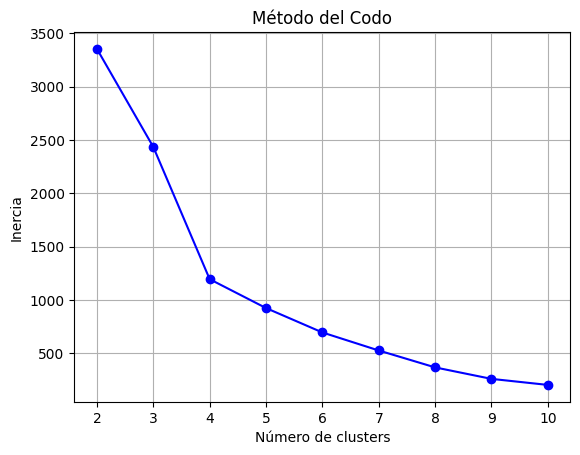

In [6]:
X = coord_ciudades[['Latitude', 'Longitude']].values
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Graficar
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

In [7]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
coord_ciudades['Region'] = kmeans.fit_predict(X)

unique_regions = coord_ciudades['Region'].unique()
num_colors = len(unique_regions)
color_palette = plt.get_cmap('tab10', num_colors)
region_color_map = {str(region): mcolors.to_hex(color_palette(i)) 
                    for i, region in enumerate(sorted(unique_regions))}

fig = px.scatter(coord_ciudades, 
                 x='Longitude', 
                 y='Latitude', 
                 color='Region',
                 labels={'Longitude': 'Longitud', 
                         'Latitude': 'Latitud',
                         'Region': 'Región'},
                 color_discrete_map=region_color_map,
                 title=f'Clustering con K-means')

fig.update_traces(marker=dict(size=10))
fig.show()

In [8]:
print(coord_ciudades.groupby('Region')['Location'].count())
coord_ciudades.head()

Region
0    19
1     7
2    17
3     6
Name: Location, dtype: int64


,Location,Latitude,Longitude,Region
0,Albury,-36.0737,146.9135,0
1,BadgerysCreek,-33.8833,150.7333,2
2,Cobar,-31.4958,145.8386,0
3,CoffsHarbour,-30.2963,153.1139,2
4,Moree,-29.4628,149.8419,2


In [9]:
df = df.merge(coord_ciudades, on='Location', how='left')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude,Region
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,-36.0737,146.9135,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,-36.0737,146.9135,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,-36.0737,146.9135,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,-36.0737,146.9135,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,-36.0737,146.9135,0


### Análisis descriptivo

**Codificación de variables categóricas**

In [10]:
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [ ]:
df = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])

**División cruzada train - test**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='RainTomorrow'), 
                                                    df['RainTomorrow'], 
                                                    test_size=0.2, 
                                                    random_state=42)

**Análisis y decisión sobre datos faltantes**

**Visualización de datos**

In [12]:
train = train = X_train.copy()
train['RainTomorrow'] = y_train.copy()
train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Latitude,Longitude,Region,RainTomorrow
111548,2017-04-24,Albany,14.5,17.8,14.2,NaN,NaN,NaN,NaN,NaN,...,1022.5,8.0,NaN,16.2,NaN,1.0,-35.0269,117.8842,1,1.0
142528,2013-10-11,Katherine,24.6,39.5,0.0,12.0,NaN,SE,31.0,N,...,1006.6,2.0,4.0,30.1,39.2,0.0,-14.4653,132.2636,3,0.0
65304,2012-02-18,MelbourneAirport,14.7,26.6,0.2,3.2,8.0,SSE,30.0,SW,...,1015.4,7.0,3.0,17.3,24.5,0.0,-37.6690,144.8410,0,0.0
40651,2012-02-18,Williamtown,18.3,26.6,0.0,NaN,NaN,SE,28.0,WSW,...,1016.5,6.0,NaN,23.0,25.4,0.0,-32.8156,151.8431,2,0.0
97487,2011-10-11,Adelaide,11.4,19.3,0.6,2.4,8.9,W,31.0,SW,...,1017.1,NaN,NaN,14.4,18.3,0.0,-34.9285,138.6007,0,0.0


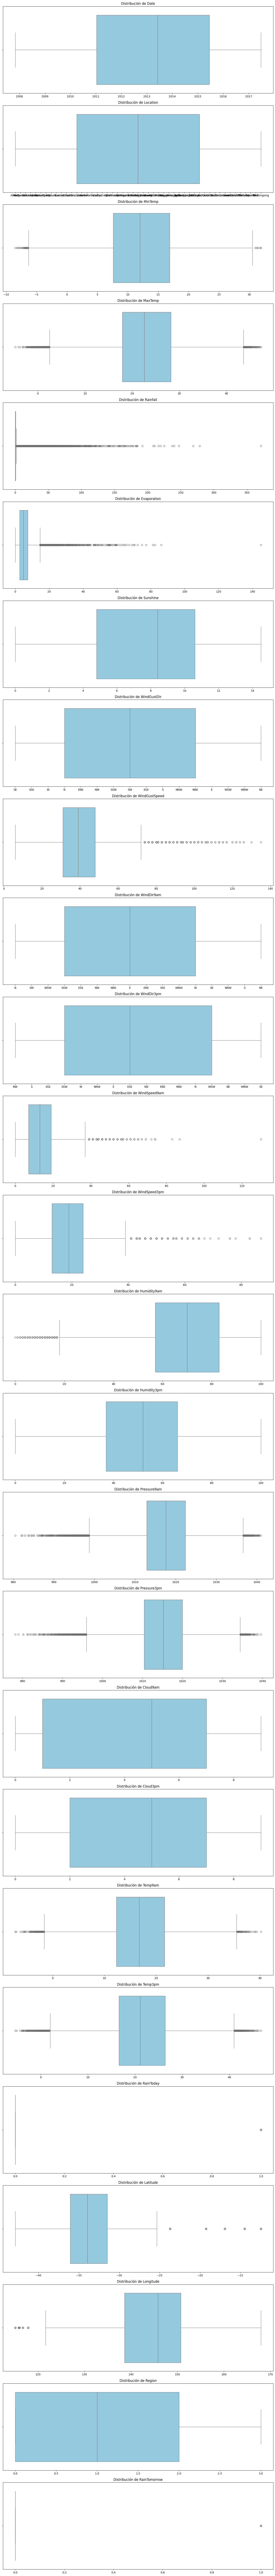

In [13]:
fig, axes = plt.subplots(nrows=len(train.columns), figsize=(14, 5*len(train.columns)))

if len(train.columns) == 1:
    axes = [axes]

for i, var in enumerate(train.columns):
    sns.boxplot(data=train, x=var, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

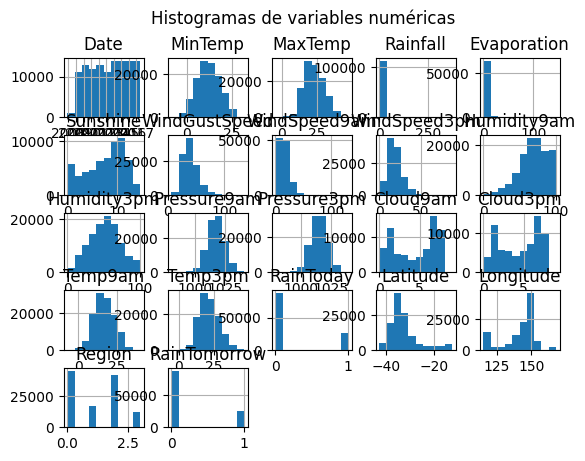

In [14]:
train.hist()
plt.suptitle("Histogramas de variables numéricas")
plt.show()

In [15]:
#sns.pairplot(train);

In [16]:
corrmat = train.corr()

sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt.title('Matriz de correlación lineal entre variables')
plt.show()

ValueError: could not convert string to float: 'Albany'

**Estandarización/escalado de datos.**

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)